### import libraries and platforms

In [ ]:
# python 3.9
#pip 20.2.4

In [ ]:
# trafile 2020.10.1
import tarfile

#pandas 1.1.3
import pandas as pd

# requests 2.24.0
import re

# tensorflow 2.4
import tensorflow as tf
from tensorflow import keras

#nltk 3.5
import nltk
from nltk.corpus import stopwords

#matplotlip 3.3.2
import matplotlib.pyplot as plt
# numpy 1.19.5
import numpy as np
from numpy import array
from numpy import asarray
from numpy import zeros

# keras 2.4.3
from keras.preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM, GRU, SimpleRNN, Conv1D, MaxPooling1D, BatchNormalization, SpatialDropout1D
from keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding
from keras.preprocessing.text import Tokenizer

#sklearn 0.23.2
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# READ THE CSV FILE
movie_reviews = pd.read_csv("/content/drive/MyDrive/my_project_work/bert5432finished.csv", index_col=0, lineterminator='\n')

movie_reviews.isnull().values.any()

movie_reviews.shape

(38690, 2)

In [ ]:
movie_reviews = movie_reviews[movie_reviews['text'].notnull()]

In [ ]:
movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38690 entries, 18816 to 2905
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       38690 non-null  object
 1   sentiment  38690 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 906.8+ KB


In [ ]:
movie_reviews['sentiment'].mask(movie_reviews['sentiment'] == 1, 0, inplace=True)
movie_reviews['sentiment'].mask(movie_reviews['sentiment'] == 2, 1, inplace=True)
movie_reviews['sentiment'].mask(movie_reviews['sentiment'] == 3, 2, inplace=True)
movie_reviews['sentiment'].mask(movie_reviews['sentiment'] == 4, 3, inplace=True)
movie_reviews['sentiment'].mask(movie_reviews['sentiment'] == 5, 4, inplace=True)

In [ ]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize
# some text cleaning functions
def convert_to_lower(text):
    return text.lower()

def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

In [ ]:
movie_reviews['text'] = movie_reviews['text'].apply(lambda x: convert_to_lower(x))
movie_reviews['text'] = movie_reviews['text'].apply(lambda x: remove_numbers(x))
movie_reviews['text'] = movie_reviews['text'].apply(lambda x: remove_punctuation(x))
movie_reviews['text'] = movie_reviews['text'].apply(lambda x: remove_stopwords(x))
movie_reviews['text'] = movie_reviews['text'].apply(lambda x: remove_extra_white_spaces(x))
movie_reviews['text'] = movie_reviews['text'].apply(lambda x: lemmatizing(x))

### 3)  Read the data 

In [ ]:
movie_reviews

,text,sentiment
18816,making war covid difficult na dey suffer pas,1
36911,kiing doctor good informing didnt ever experie...,1
38631,doctor remove covid getting one preventable va...,1
14036,video nigerian born doctor stella clara emmanu...,3
20430,seems people often concerned public tweet retw...,2
...,...,...
25629,vaccine madame,0
21309,doctor ng olajumoke worst every body injury ma...,4
2319,doctor sister already took vaccine dubai front...,4
33690,better creating vaccine cure except possibly g...,1


In [ ]:
movie_reviews['sentiment'].value_counts()

1    7738
3    7738
2    7738
0    7738
4    7738
Name: sentiment, dtype: int64

In [ ]:
movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38690 entries, 18816 to 2905
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       38690 non-null  object
 1   sentiment  38690 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 906.8+ KB


In [ ]:
#sample of the data
movie_reviews.head(20)

,text,sentiment
18816,making war covid difficult na dey suffer pas,1
36911,kiing doctor good informing didnt ever experie...,1
38631,doctor remove covid getting one preventable va...,1
14036,video nigerian born doctor stella clara emmanu...,3
20430,seems people often concerned public tweet retw...,2
26917,doctor side effect vaccine taken,0
19152,also known bringing like hundred melaye speak ...,2
17267,doctor malaria vaccine trial moment entire mea...,4
7979,nuel el doctor fellow woman french certified f...,4
33392,doctor age limit first hpv vaccine heard bette...,1


In [ ]:
from nltk.tokenize import word_tokenize
import nltk


def create_corpus_tk(df):
    corpus = []
    for text in movie_reviews["text"]:
        words = [word.lower() for word in word_tokenize(text)]
        corpus.append(words)
    return corpus

In [ ]:
corpus = create_corpus_tk(movie_reviews)

In [ ]:
num_words = len(corpus)
print(num_words)

38690


In [ ]:
corpus[0]

['making', 'war', 'covid', 'difficult', 'na', 'dey', 'suffer', 'pas']

In [ ]:
#showing 3 reviews
movie_reviews["text"][3]

'hope vaccine work nd affordable'

## preproccessing data

# splitting data

In [ ]:
#Splitting data train:70% validation:10% test: 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(movie_reviews['text'], movie_reviews['sentiment'], train_size=0.75)
# X_train, y_train = X[:35000],  y[:35000]
# X_val,y_val= X[35000:40000], y[35000:40000] 
# X_test , y_test =X[40000:50000], y[40000:50000]

In [ ]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 5)
y_test = to_categorical(y_test, 5)

### tokenizing  data

In [ ]:
#extract tokens from the text the number of tokens is 5000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
# convert the text to a numeric sequence 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
# X_val = tokenizer.texts_to_sequences(X_val)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

print('Found %s unique tokens.' % vocab_size)

Found 16339 unique tokens.


(array([2.162e+03, 7.362e+03, 7.140e+03, 5.846e+03, 4.675e+03, 1.666e+03,
        1.250e+02, 1.900e+01, 1.800e+01, 4.000e+00]),
 array([ 0. ,  5.9, 11.8, 17.7, 23.6, 29.5, 35.4, 41.3, 47.2, 53.1, 59. ]),
 <a list of 10 Patch objects>)

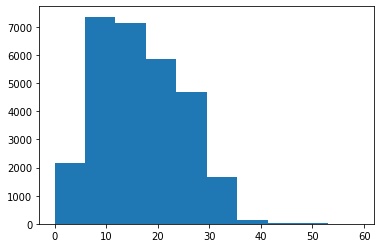

In [ ]:
sequence_lengths = []

for i in range(len(X_train)):
  sequence_lengths.append(len(X_train[i]))
import matplotlib.pyplot as plt
plt.hist(sequence_lengths) ## most of the sequence are between 0 and 60

In [ ]:
pd.Series(sequence_lengths).describe()

count    29017.000000
mean        16.429128
std          8.141943
min          0.000000
25%         10.000000
50%         16.000000
75%         23.000000
max         59.000000
dtype: float64

maxlen: Optional Int, maximum length of all sequences. If not provided,  sequences will be padded to the length of the longest individual sequence.
padding: 'post'means the pad is after each sequence.

In [ ]:
#max length of sequence

maxlen = 60
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
# X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
X_train.shape #value of num_words and padding with maxlen 

(29017, 60)

Vectors for representing words are generally called embeddings, because the word is embedded in a particular vector space.

In [ ]:
# importing the dictionary of words 'glove.6B.200d'

embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/my_project_work/glove.6B.200d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_size, 200))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# building the model

- Layer 1, LSTM(128), reads the input data and outputs 128 features with 2 timesteps for each because return_sequences=True.
 - Setting the return_sequences=True makes each cell per timestep emit a signal.
 
- Layer 2, LSTM(32), takes the 3x128 input from Layer 1 and reduces the feature size to 32. 

In [ ]:
# Initialising the RNN
model = Sequential()
embedding_layer = Embedding(vocab_size, 200,
                            weights=[embedding_matrix],
                            input_length=maxlen ,
                            trainable=False)
model.add(embedding_layer)
#first LSTM layer
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.2))
#second LSTM layer
model.add(LSTM(32))
model.add(Dropout(0.2))

# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
#activation is sigmoid 
model.add(Dense(1, activation='sigmoid'))
#optimizer is Adam
#compile and fit the model 
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['acc'])   

In [ ]:
# # 79% graph wierd
# LSTM 
# model = Sequential()
# embedding_layer = Embedding(vocab_size, 200,
#                             weights=[embedding_matrix],
#                             input_length=maxlen,
#                             trainable=False)
# model.add(embedding_layer)
# model.add(Dropout(0.2))
# model.add(LSTM(100))
# model.add(Dropout(0.2))
# model.add(Dense(3, activation='softmax'))

# model.compile(optimizer = 'adam',
#               loss = 'categorical_crossentropy',
#               metrics=['acc'])  

In [ ]:
# 76% not bad
# CNN-LSTM
model = Sequential()
embedding_layer = Embedding(vocab_size, 200,
                            weights=[embedding_matrix],
                            input_length=maxlen,
                            trainable=False)
model.add(embedding_layer)
model.add(Dropout(0.2))
model.add(Conv1D(128, 4, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(32))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['acc'])  

In [ ]:
# 76% not bad
# CNN
model = Sequential()
embedding_layer = Embedding(vocab_size, 200,
                            weights=[embedding_matrix],
                            input_length=maxlen,
                            trainable=False)
model.add(embedding_layer)
model.add(Dropout(0.2))
model.add(Conv1D(128, 4, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['acc'])  

In [ ]:
# Initialising the RNN
model = Sequential()
embedding_layer = Embedding(vocab_size, 200,
                            weights=[embedding_matrix],
                            input_length=maxlen ,
                            trainable=False)
model.add(embedding_layer)
#first LSTM layer
model.add(LSTM(128,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
#second LSTM layer
model.add(LSTM(64, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
#activation is sigmoid 
model.add(Dense(1, activation='sigmoid'))
#optimizer is Adam
#compile and fit the model 
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['acc'])   

In [ ]:
def createmodel():
    model = Sequential()
    embedding_layer = Embedding(vocab_size, 200,
                            weights=[embedding_matrix],
                            input_length=maxlen ,
                            trainable=False)
    model.add(embedding_layer)
    model.add(SpatialDropout1D(0.4))
    model.add(LSTM(192, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(2,activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
    return model

In [ ]:

# Initialising the RNN
# 88% with 32 for lstm second layer
model = Sequential()
embedding_layer = Embedding(vocab_size, 200,
                            weights=[embedding_matrix],
                            input_length=maxlen ,
                            trainable=False)
model.add(embedding_layer)
#first LSTM layer
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences='True'))
model.add(Dropout(0.2))
#second LSTM layer
model.add(LSTM(32))
model.add(Dropout(0.2))

# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
#activation is sigmoid 
model.add(Dense(1, activation='sigmoid'))
#optimizer is Adam
#compile and fit the model 
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics=['acc'])   

In [ ]:

# Initialising the RNN
# 88% with 32 for lstm second layer
model = Sequential()
embedding_layer = Embedding(vocab_size, 200,
                            weights=[embedding_matrix],
                            input_length=maxlen ,
                            trainable=False)
model.add(embedding_layer)
#first LSTM layer
model.add(LSTM(100))
model.add(Dropout(0.2))
#second LSTM layer
# model.add(LSTM(32))
# model.add(Dropout(0.2))

# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
#activation is sigmoid 
model.add(Dense(1, activation='sigmoid'))
#optimizer is Adam
#compile and fit the model 
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics=['acc'])   

In [ ]:
from tensorflow.keras.layers import Dense, Input , Dropout,Flatten,concatenate,LSTM,Conv1D,BatchNormalization,Bidirectional
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Model,load_model

review = Input(shape=(90,), name='review_input')

X = Embedding(input_dim=vocab_size, 
              output_dim=200,
              weights=[embedding_matrix],
              input_length=maxlen ,
              trainable=False)(review)
lstm_review = Bidirectional(LSTM(100))(X)


model = Dropout(0.2)(lstm_review)

model = Flatten()(model)

model = Dense(64,activation='relu',kernel_initializer='he_normal' ,kernel_regularizer=l2(0.001))(model)

model = Dense(8,activation='relu',kernel_initializer='he_normal' ,kernel_regularizer=l2(0.001))(model)

output = Dense(1, activation='sigmoid', name='output')(model)

model = Model(inputs=[review ],outputs=[output])

model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics=['acc']) 

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 review_input (InputLayer)   [(None, 90)]              0         
                                                                 
 embedding_6 (Embedding)     (None, 90, 200)           3267800   
                                                                 
 bidirectional (Bidirectiona  (None, 200)              240800    
 l)                                                              
                                                                 
 dropout_11 (Dropout)        (None, 200)               0         
                                                                 
 flatten_1 (Flatten)         (None, 200)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                12864     
                                                             

In [ ]:
# Initialising the RNN
#85%
# AI University
model = Sequential()
embedding_layer = Embedding(vocab_size, 200,
                            weights=[embedding_matrix],
                            input_length=maxlen ,
                            trainable=False)
model.add(embedding_layer)
#first LSTM layer
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))

# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
#activation is sigmoid 
model.add(Dense(3, activation='softmax'))
#optimizer is Adam
#compile and fit the model 
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['acc']) 

In [ ]:
# Initialising the RNN
model = Sequential()
embedding_layer = Embedding(vocab_size, 200,
                            weights=[embedding_matrix],
                            input_length=maxlen ,
                            trainable=False)
model.add(embedding_layer)
#first LSTM layer
model.add(Dropout(0.2))
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.2))
#second LSTM layer
model.add(LSTM(32))
model.add(Dropout(0.2))

# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
#activation is sigmoid 
model.add(Dense(3, activation='softmax'))
#optimizer is Adam
#compile and fit the model 
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['acc'])   

In [ ]:
# 77% not bad
# GRU 
model = Sequential()
embedding_layer = Embedding(vocab_size, 200,
                            weights=[embedding_matrix],
                            input_length=maxlen,
                            trainable=False)
model.add(embedding_layer)
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(10, activation='softmax'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['acc'])  

In [ ]:
# Initialising the RNN
#85%
# AI University
model = Sequential()
embedding_layer = Embedding(vocab_size, 200,
                            weights=[embedding_matrix],
                            input_length=maxlen ,
                            trainable=False)
model.add(embedding_layer)
#first LSTM layer
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))

# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
#activation is sigmoid 
model.add(Dense(5, activation='softmax'))
#optimizer is Adam
#compile and fit the model 


In [ ]:
# very bad 49% graph wierd
model = Sequential()
embedding_layer = Embedding(vocab_size, 200,
                            weights=[embedding_matrix],
                            input_length=maxlen,
                            trainable=False)
model.add(embedding_layer)
model.add(Dropout(0.2))
model.add(SimpleRNN(32))
model.add(Dense(5, activation='softmax'))

In [ ]:
# 77% not bad
# GRU 
model = Sequential()
embedding_layer = Embedding(vocab_size, 200,
                            weights=[embedding_matrix],
                            input_length=maxlen,
                            trainable=False)
model.add(embedding_layer)
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
# model.add(GRU(100))
# model.add(SimpleRNN(32))
model.add(Dense(5, activation='softmax'))


In [ ]:
# Bidirectional LSTM
model = Sequential()
embedding_layer = Embedding(vocab_size, 200,
                            weights=[embedding_matrix],
                            input_length=maxlen,
                            trainable=False)
model.add(embedding_layer)
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(100))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))


In [ ]:
pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 30.7 MB/s 


In [ ]:
import tensorflow_addons as tfa
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tfa.metrics.F1Score(num_classes= 5, name= 'f1_score')
]
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=METRICS) 

In [ ]:
print(model.summary())


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 60, 200)           3267800   
                                                                 
 dropout_22 (Dropout)        (None, 60, 200)           0         
                                                                 
 lstm_16 (LSTM)              (None, 60, 100)           120400    
                                                                 
 dropout_23 (Dropout)        (None, 60, 100)           0         
                                                                 
 gru (GRU)                   (None, 100)               60600     
                                                                 
 dropout_24 (Dropout)        (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 5)               

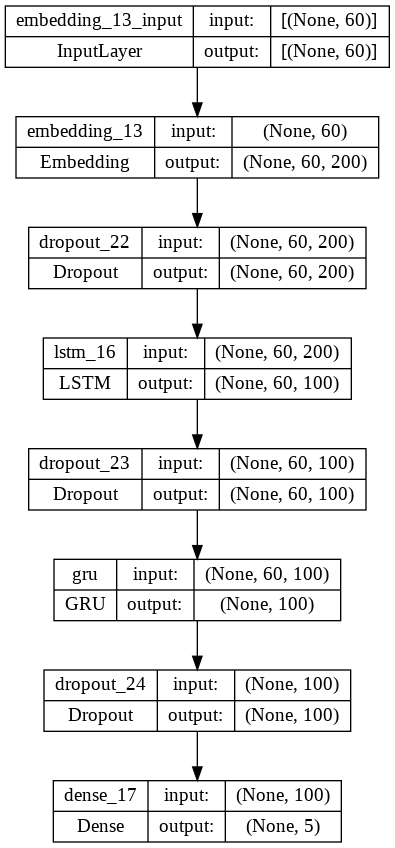

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model,
           to_file='model_plot.png',
           show_shapes=True, 
           show_layer_names=True)

## training

In [ ]:
trained_model=model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_test, y_test), shuffle=False)
# score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/50
227/227 [==============================] - 19s 45ms/step - loss: 1.4887 - accuracy: 0.7995 - precision: 0.4638 - recall: 0.0170 - f1_score: 0.2822 - val_loss: 1.4451 - val_accuracy: 0.7997 - val_precision: 0.4886 - val_recall: 0.0310 - val_f1_score: 0.2656
Epoch 2/50
227/227 [==============================] - 8s 35ms/step - loss: 1.3707 - accuracy: 0.8059 - precision: 0.5706 - recall: 0.1188 - f1_score: 0.3743 - val_loss: 1.3275 - val_accuracy: 0.8075 - val_precision: 0.6204 - val_recall: 0.0967 - val_f1_score: 0.4287
Epoch 3/50
227/227 [==============================] - 9s 39ms/step - loss: 1.2510 - accuracy: 0.8186 - precision: 0.6261 - recall: 0.2310 - f1_score: 0.4587 - val_loss: 1.2085 - val_accuracy: 0.8229 - val_precision: 0.7079 - val_recall: 0.1947 - val_f1_score: 0.4902
Epoch 4/50
227/227 [==============================] - 10s 44ms/step - loss: 1.1686 - accuracy: 0.8306 - precision: 0.6704 - recall: 0.3009 - f1_score: 0.5054 - val_loss: 1.1126 - val_accuracy: 0.835

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

303/303 [==============================] - 2s 8ms/step - loss: 0.5895 - accuracy: 0.9375 - precision: 0.8509 - recall: 0.8332 - f1_score: 0.8357


# Confusion Matrix

In [ ]:
model.save('/content/drive/MyDrive/my_project_work/preciousLSTMGRU')

In [ ]:
from tensorflow.keras.models import load_model
path='/content/drive/MyDrive/my_project_work/preciousLSTMGRU'
model = load_model((path))

In [ ]:
predictions=model.predict(X_test)
predictions = predictions.round().astype('float')
predictions

303/303 [==============================] - 4s 8ms/step


array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
from sklearn.metrics import accuracy_score
Acc=accuracy_score(predictions, y_test)
print('The accuracy of the model on test set is : {}'.format(Acc))

The accuracy of the model on test set is : 0.833247182880182


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(predictions, y_test))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.77      0.73      1718
           1       0.96      0.91      0.94      1991
           2       0.93      0.81      0.86      2232
           3       0.94      0.88      0.91      2138
           4       0.64      0.89      0.75      1393

   micro avg       0.83      0.85      0.84      9472
   macro avg       0.83      0.85      0.84      9472
weighted avg       0.85      0.85      0.85      9472
 samples avg       0.83      0.83      0.83      9472



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Confusion Matrix for the test set is :


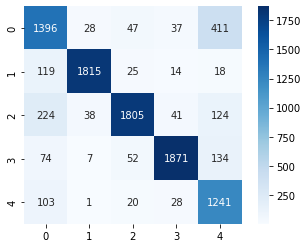

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(predictions.argmax(axis=1), y_test.argmax(axis=1))
print('The Confusion Matrix for the test set is :')
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar='False')

# F1 Score

The formula for the standard F1-score is the harmonic mean of the precision and recall. A perfect model has an F-score of 1.


the accuracy is the proportion of correct predictions (both true positives and true negatives) among the total number of cases examined. 
- Accuracy = (TP + TN)/(TP + TN + FP + FN)


# Test score and accuracy

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.589544951915741
Test Accuracy: 0.9374547600746155


# Validation score and accuracy

In [ ]:
# score_val= model.evaluate(X_val, y_val, verbose=1)
# print("Validation Score:", score_val[0])
# print("Validation Accuracy:", score_val[1])

# Model accuracy and loss for training and testing 

loss:  Mean Square Error (MSE) is the most commonly used regression loss function. MSE is the sum of squared distances between our target variable and predicted values.

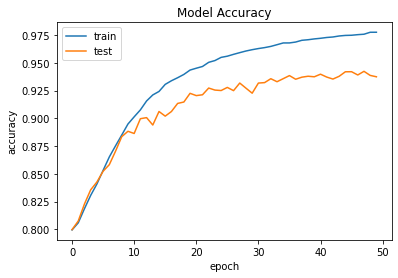

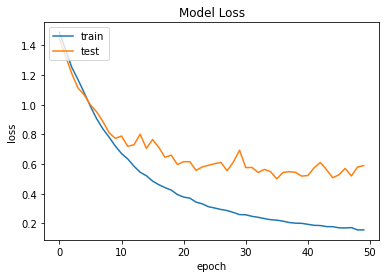

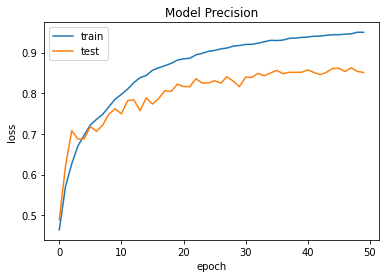

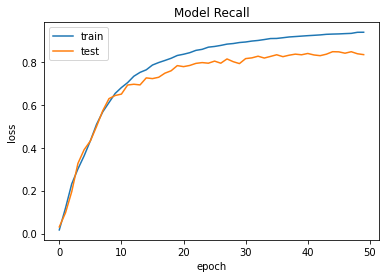

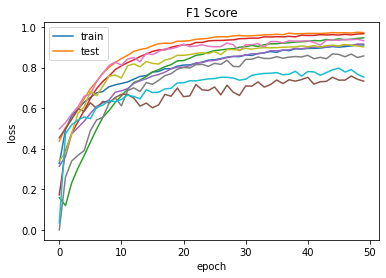

In [ ]:
import matplotlib.pyplot as plt
plt.plot(trained_model.history ['accuracy'])
plt.plot(trained_model.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(trained_model.history['precision'])
plt.plot(trained_model.history['val_precision'])

plt.title('Model Precision')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(trained_model.history['recall'])
plt.plot(trained_model.history['val_recall'])

plt.title('Model Recall')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(trained_model.history['f1_score'])
plt.plot(trained_model.history['val_f1_score'])

plt.title('F1 Score')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# cleaning data 

/TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

SyntaxError: ignored

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

In [ ]:
y_pred = model.predict(X_test)
for i in range(10):
  print("X=%s, Predicted=%s" % (X_test[i].any(), y_pred[i].any()))
  if y_pred[i].any() < 0.5:
    print('Negative Review')
  elif y_pred[i].any() == 0.5:
    print('Neutral Review')
  else:
    print('Positive Review')

In [ ]:
TEST_REVIEW_NEGATIVE = input('Enter your value: ')

In [ ]:
remove_tags(TEST_REVIEW_NEGATIVE)
preprocess_text(TEST_REVIEW_NEGATIVE)
lemmatizing(TEST_REVIEW_NEGATIVE)
TEST_REVIEW_NEGATIVE = tokenizer.texts_to_sequences(TEST_REVIEW_NEGATIVE)
TEST_REVIEW_NEGATIVE = pad_sequences(TEST_REVIEW_NEGATIVE, padding='post', maxlen=maxlen)

In [ ]:
y_pred = model.predict(TEST_REVIEW_NEGATIVE)
if y_pred[0].any() < 0.5:
  value = "Negative Review"
elif y_pred[0].any() == 0.5:
  value = "Neutral Review"
else:
  value = "Positive Review"
print("Predicted=%s, %s " % (y_pred[0], value))

# Model plot
### - showing layers input and output dimentions

### finally we can save the model in h5 format